In [1]:
import os

In [2]:
data = "D:\\corona\\CNN_data\\cell_images"

In [3]:
os.listdir(data)

['test', 'train']

# Does the Cell is effected by Malaria?

### MAIN_TASK : So we are going to build a model that just based on the image of a cell can predict wheather it is infected or not


## Using CNN for custom Images

# Part1 : The Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# import which will help us to read in image files directly
from matplotlib.image import imread

In [6]:
# Add test & train directory to my data path 
test_path = data+"\\test\\"       
train_path = data+"\\train\\"

In [7]:
test_path

'D:\\corona\\CNN_data\\cell_images\\test\\'

In [8]:
os.listdir(test_path) # these are the 2 folders inside test directory

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
# lets look into the single image

os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
# Now basically i have to tell image read function where this file actually located
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [12]:
imread(para_cell).shape

(148, 142, 3)

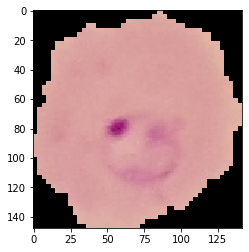

In [13]:
plt.imshow(imread(para_cell))

In [14]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [15]:
uninfected_cell = train_path+"uninfected\\"+'C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_cell

'D:\\corona\\CNN_data\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
uninfected_cell = imread(uninfected_cell)
uninfected_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

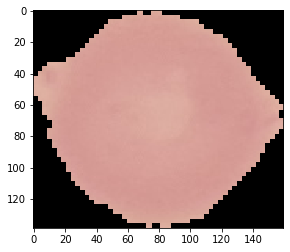

In [17]:
plt.imshow(uninfected_cell)

In [18]:
len(os.listdir(train_path+'parasitized'))

12480

In [19]:
len(os.listdir(train_path+'uninfected'))

12480

In [20]:
len(os.listdir(test_path+'parasitized'))

1300

In [21]:
len(os.listdir(test_path+'uninfected'))

1300

### Figuring out the average shape of single image

#### inreal life images they have lot of different dimensions 
##### one way to do this :
##### setup 2 list & create a for loop where you iterate through all the images & read them

In [22]:
dim1 = []
dim2 = []

# for x in __loc__: 
#       img = read_that_file_as_array

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    
    # iterating through every file 
    # Check shape of each of them & then save there first & second dimension
    
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [23]:
dim2

[118,
 145,
 151,
 145,
 139,
 136,
 160,
 121,
 142,
 121,
 100,
 151,
 139,
 151,
 112,
 124,
 145,
 115,
 166,
 130,
 133,
 130,
 136,
 136,
 124,
 115,
 142,
 190,
 151,
 163,
 112,
 142,
 151,
 127,
 142,
 172,
 151,
 127,
 154,
 91,
 124,
 139,
 124,
 127,
 148,
 118,
 148,
 157,
 139,
 145,
 154,
 163,
 148,
 130,
 160,
 136,
 121,
 169,
 145,
 115,
 106,
 124,
 130,
 112,
 124,
 106,
 112,
 121,
 100,
 115,
 136,
 118,
 127,
 148,
 130,
 118,
 124,
 139,
 133,
 118,
 121,
 127,
 136,
 127,
 124,
 124,
 136,
 130,
 130,
 112,
 127,
 136,
 130,
 124,
 130,
 109,
 169,
 124,
 142,
 127,
 106,
 130,
 97,
 100,
 145,
 106,
 148,
 136,
 136,
 133,
 121,
 133,
 136,
 157,
 133,
 139,
 127,
 139,
 151,
 157,
 148,
 163,
 145,
 136,
 127,
 130,
 160,
 133,
 130,
 121,
 136,
 145,
 121,
 142,
 148,
 148,
 127,
 139,
 148,
 148,
 151,
 160,
 154,
 145,
 139,
 127,
 121,
 106,
 106,
 145,
 112,
 130,
 124,
 139,
 145,
 142,
 151,
 130,
 118,
 133,
 154,
 136,
 139,
 121,
 142,
 148,
 136,


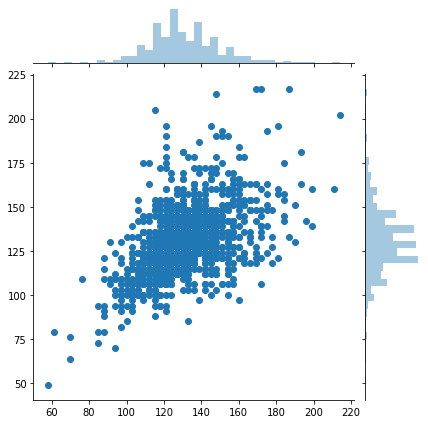

In [24]:
sns.jointplot(dim1,dim2)

#### why this is important?
#### - Bcz the CNN isn't going to be able to train images of various sizes. So we are going to resize all the images of same size.

In [25]:
np.mean(dim1)

130.92538461538462

In [26]:
np.mean(dim2)

130.75

In [27]:
# our final image shape which we will be feeding in CNN 
image_shape = (130,130,3)

# Part 2 : Image Data Generator

#### The size of our data is very big i.e 130 * 130 * 3 = 50700 bcz of that we are not gonna able to feed everything at once instead we have to select the batches of our images 
##### Our model should over come the fact that it should be robust enough to deal with image which are pretty different img which we seen before & we can do that by manipulating & performing transormation on the images like rotation, resizeing & scalling

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
#help(ImageDataGenerator)

In [30]:
# Lets create an instance of ImageDataGenerator
img_gen = ImageDataGenerator(rotation_range=20,               # Take our current images & randomly rotate them
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,                 # shear : cutting certain part of image 
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')            # how I am going to fill missing data? nearest pixel value

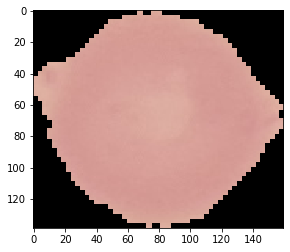

In [31]:
plt.imshow(uninfected_cell)

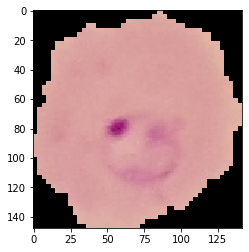

In [32]:
para_img = imread(para_cell)
plt.imshow(para_img)

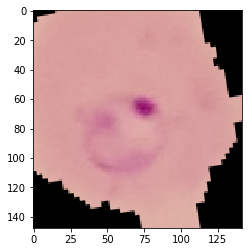

In [33]:
# take my img generator obj which i have defined above & call a single random transformation
plt.imshow(img_gen.random_transform(para_img))

In [34]:
# How do we setup our dir to flow batches from dir


# In order to use .flow_from_directory, you must organize the image in sub-directories. 
# This is an absolute requirement, other wise the method wont work.
# The directories only contain images of one class, so one folder per class of img

img_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


# Part 3 : Creating a Actual model

https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

##### different rules for selecting num of neurons & filters in convolutional layers

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) # Flat our dense layers

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) # turnoff half of the neurons randomly which prevent overfitting

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [37]:
# Training our model

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

# selecting a batch size to train our model

batch_size = 16

train_img_gen = img_gen.flow_from_directory(train_path,
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            target_size=(130,130)) #height & width of image which was 130,130,3 in our img_shape



test_img_gen = img_gen.flow_from_directory(test_path,
                                            shuffle=False,      # Never shuffle data at test dataset
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            target_size=(130,130)) #height & width of image which was 130,130,3 in our img_shape


Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [38]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [39]:
# results = model.fit_generator(train_img_gen,epochs=20,
#                              validation_data=test_img_gen,
#                              callbacks=[early_stopping])


In [40]:
from tensorflow.keras.models import load_model

model = load_model('malaria_detector.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [41]:
# Alternative of model.history.history but can be little bit different

model.evaluate_generator(test_img_gen)

[2.078727343775539, 0.8638462]

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
pred = model.predict_generator(test_img_gen)

In [44]:
pred         # they looks like class 0 & 1 but they are actually probability values

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [45]:
predictions = pred > 0.8
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [47]:
print(confusion_matrix(test_img_gen.classes,predictions))

[[1268   32]
 [ 305  995]]


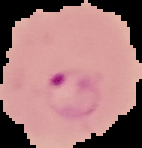

In [48]:
from tensorflow.keras.preprocessing import image

image.load_img(para_cell)

In [49]:
print(type(image.load_img(para_cell)))

<class 'PIL.PngImagePlugin.PngImageFile'>


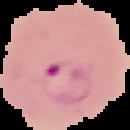

In [50]:
my_image = image.load_img(para_cell,target_size=image_shape)
my_image

In [51]:
# Read this image & pass it to the model

my_image_array = image.img_to_array(my_image)
my_image_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [59]:
#plt.imshow(my_image_array)

In [53]:
my_image_array.shape

(130, 130, 3)

In [54]:
# Resize at 0 dimension

# model want : 1 img of 130*130 of 3 color channels

my_image_array = np.expand_dims(my_image_array,axis=0)
my_image_array.shape

(1, 130, 130, 3)

In [55]:
model.predict(my_image_array)

array([[0.]], dtype=float32)

In [56]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}